### Essentials

In [2]:
# Imports necessary python libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Overview of the Data

In [4]:
# Reads the csv file and stores it to variable 'df'
df = pd.read_csv('spotify-2023.csv', encoding = 'ISO-8859-1')

In [5]:
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [6]:
df.tail()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5
952,Alone,Burna Boy,1,2022,11,4,782,2,96007391,27,...,90,E,Minor,61,32,67,15,0,11,5


### Data Cleaning and Preprocessing

#### Handling Missing Values

In [8]:
# Sums the number of 'NaN' (missing) values in each column of the DataFrame
print(df.isna().sum())

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64


In [9]:
# Fills NaN values with string value 'unrecorded'
df = df.fillna('unrecorded')
print(df.isna().sum())

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64


#### Handling Data Type Inconsistencies

In [11]:
# Prints the data type of each column
print(df.dtypes)

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object


In [12]:
# Creates separate columns for better visualization
streams_column = df['streams']
deezerp_column = df['in_deezer_playlists']
shazamc_column = df['in_shazam_charts']

# Filters the column and selects non-numeric values only
print(streams_column[~streams_column.str.isnumeric()], '\n')
print(deezerp_column[~deezerp_column.str.isnumeric()].head(), '\n')
print(shazamc_column[~shazamc_column.str.isnumeric()].head())

574    BPM110KeyAModeMajorDanceability53Valence75Ener...
Name: streams, dtype: object 

48    2,445
54    3,394
55    3,421
65    4,053
73    1,056
Name: in_deezer_playlists, dtype: object 

12         1,021
13         1,281
14    unrecorded
17         1,173
24         1,093
Name: in_shazam_charts, dtype: object


In [13]:
# Converts non-numeric values to NaN, allowing for column conversion to numeric data type
df['streams'] = pd.to_numeric(df['streams'], errors = 'coerce')
df['in_deezer_playlists'] = pd.to_numeric(df['in_deezer_playlists'].str.replace(',', ''), errors='coerce')
df['in_shazam_charts'] = pd.to_numeric(df['in_shazam_charts'].str.replace(',', ''), errors='coerce')

# Checks their new data type
print(df['streams'].dtype)
print(df['in_deezer_playlists'].dtype)
print(df['in_shazam_charts'].dtype)

float64
int64
float64


#### Handling Duplicates

In [15]:
# Filters the rows with existing duplicates
df[df.duplicated()]

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%


In [16]:
# Splits the artists' names and converts them into a list
df['artist(s)_name'] = df['artist(s)_name'].str.split(', ')

# Checks for duplicates
has_duplicates = df['artist(s)_name'].apply(lambda x: len(x) != len(set(x)))

# Filters rows that has duplicates
df[has_duplicates]

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
209,Area Codes,"[Kaliii, Kaliii]",2,2023,3,17,1197,13,113509496.0,44,...,155,C#,Major,82,51,39,2,0,9,49
503,Fingers Crossed,"[Lauren Spencer Smith, Lauren Spencer Smith, L...",3,2022,1,5,2235,0,349585590.0,65,...,109,F,Major,60,45,47,62,0,31,5


In [17]:
# Removes the duplicates
df['artist(s)_name'] = df['artist(s)_name'].apply(lambda x: list(set(x)))
df[has_duplicates]

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
209,Area Codes,[Kaliii],2,2023,3,17,1197,13,113509496.0,44,...,155,C#,Major,82,51,39,2,0,9,49
503,Fingers Crossed,[Lauren Spencer Smith],3,2022,1,5,2235,0,349585590.0,65,...,109,F,Major,60,45,47,62,0,31,5


In [18]:
df['artist_count'] = df['artist(s)_name'].str.len()
df[has_duplicates]

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
209,Area Codes,[Kaliii],1,2023,3,17,1197,13,113509496.0,44,...,155,C#,Major,82,51,39,2,0,9,49
503,Fingers Crossed,[Lauren Spencer Smith],1,2022,1,5,2235,0,349585590.0,65,...,109,F,Major,60,45,47,62,0,31,5


### Data Exploration and Analysis

#### Summary of Statistics

In [20]:
df.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,9.520000e+02,953.000000,953.000000,953.000000,953.000000,903.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.551941,2018.238195,6.033578,13.930745,5200.124869,12.009444,5.141374e+08,67.812172,51.908709,385.187828,2.666317,59.995570,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.886215,11.116218,3.566435,9.201949,7897.608990,19.575992,5.668569e+08,86.441493,50.630241,1130.535561,6.035599,161.161093,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,2.762000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,1.416362e+08,13.000000,7.000000,13.000000,0.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,2.905309e+08,34.000000,38.000000,44.000000,0.000000,2.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,6.738690e+08,88.000000,87.000000,164.000000,2.000000,37.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,3.703895e+09,672.000000,275.000000,12367.000000,58.000000,1451.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


#### Data Visualization

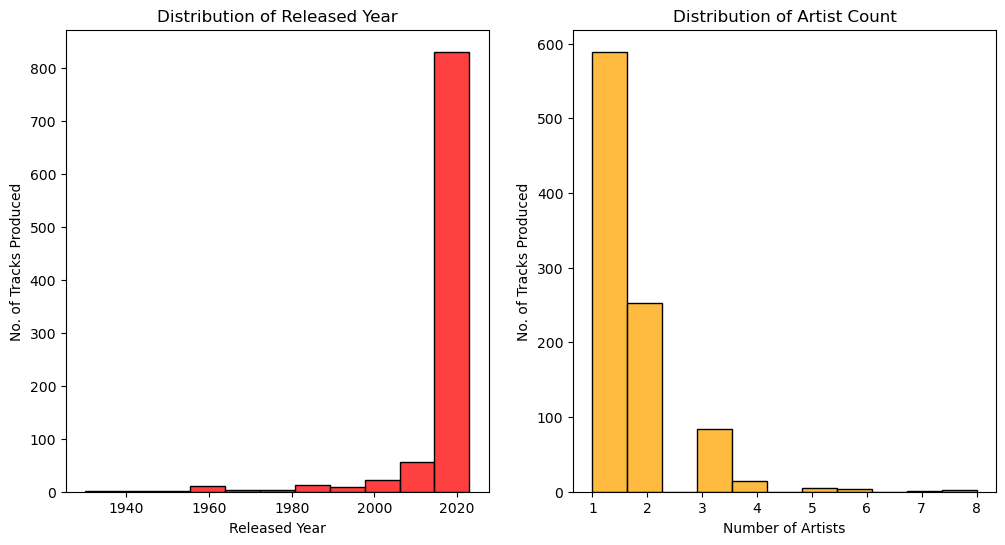

In [22]:
# Sets the figure size to shape (12, 6)
plt.figure(figsize=(12, 6))

# Creates a subplot that has 2 plots in position 1
plt.subplot(1,2,1)

# Plots a histogram with 'released_year' as the column being considered
sns.histplot(data = df, x = 'released_year', bins=11, color = 'Red')

# Adds the necessary labels for the graph 
plt.title('Distribution of Released Year')
plt.xlabel('Released Year')
plt.ylabel('No. of Tracks Produced')

# Creates a subplot that has 2 plots in position 2
plt.subplot(1,2,2)

# Plots a histogram with 'released_year' as the column being considered
sns.histplot(data = df, x = 'artist_count', bins = 11, color='Orange')

# Adds the necessary labels for the graph 
plt.title('Distribution of Artist Count')
plt.xlabel('Number of Artists')
plt.ylabel('No. of Tracks Produced')

# Displays the plot
plt.show()

In [23]:
# Obtains the 5 highest values in the 'streams' column
top5_tracks_instreams = df.nlargest(5, 'streams')

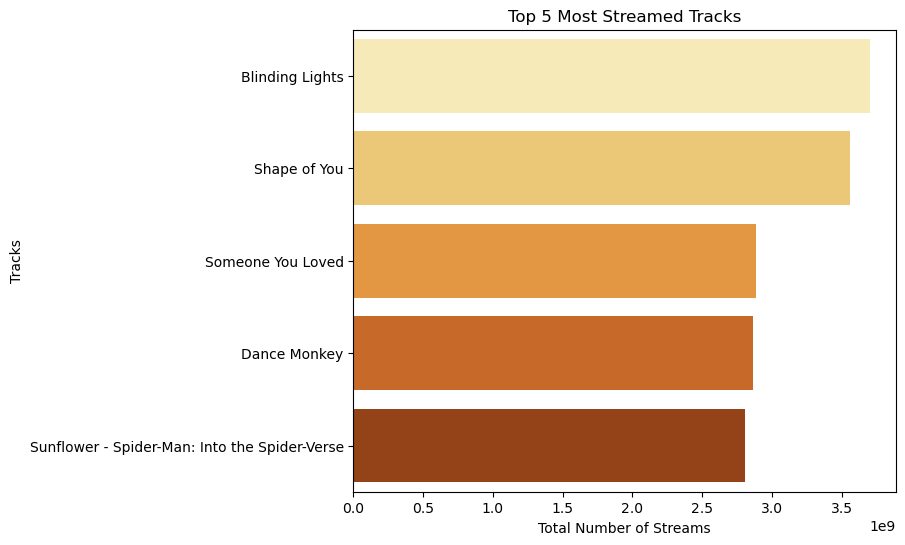

In [24]:
# Sets the figure size to shape (7, 6)
plt.figure(figsize=(7, 6))

# Plots a horizontal barplot with 'streams' and 'track_name' as x and y respectively
sns.barplot(data = top5_tracks_instreams, x = 'streams', y = 'track_name', hue = 'track_name', palette = 'YlOrBr')

# Adds the necessary labels for the graph 
plt.title('Top 5 Most Streamed Tracks')
plt.xlabel('Total Number of Streams')
plt.ylabel('Tracks')

# Displays the plot
plt.show()

In [25]:
# Explodes the 'artist(s)_name' column
df_exploded = df.explode('artist(s)_name').reset_index(drop=True)

# Counts the total number of tracks each artist produced
artist_trackcount = df_exploded['artist(s)_name'].value_counts()

# Obtains the 5 highest values in the 'artist_trackcount'
top5_artist_intracks = artist_trackcount.nlargest(5).reset_index()

# Converts the previously listed 'artist(s)_name' column into strings
df['artist(s)_name'] = df['artist(s)_name'].apply(lambda x: ', '.join(x))

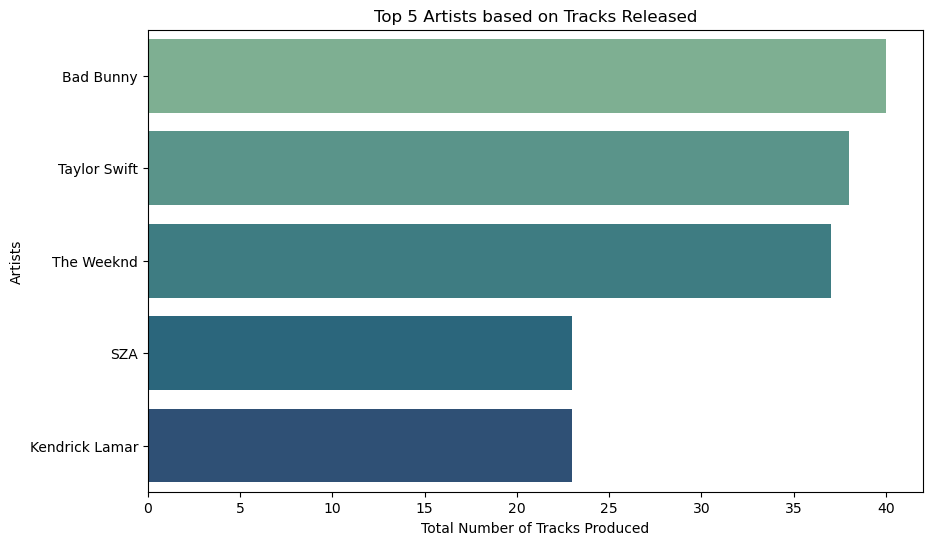

In [26]:
# Sets the figure size to shape (10, 6)
plt.figure(figsize=(10, 6))

# Plots a horizontal barplot with 'count' and 'artist(s)_name' as x and y respectively
sns.barplot(data = top5_artist_intracks, x = 'count', y = 'artist(s)_name', hue = 'artist(s)_name', palette = 'crest')

# Adds the necessary labels for the graph
plt.title('Top 5 Artists based on Tracks Released')
plt.xlabel('Total Number of Tracks Produced')
plt.ylabel('Artists')

# Displays the plot
plt.show()

In [27]:
# Counts the total number of tracks released per year
tracks_inyears = df['released_year'].value_counts().reset_index()

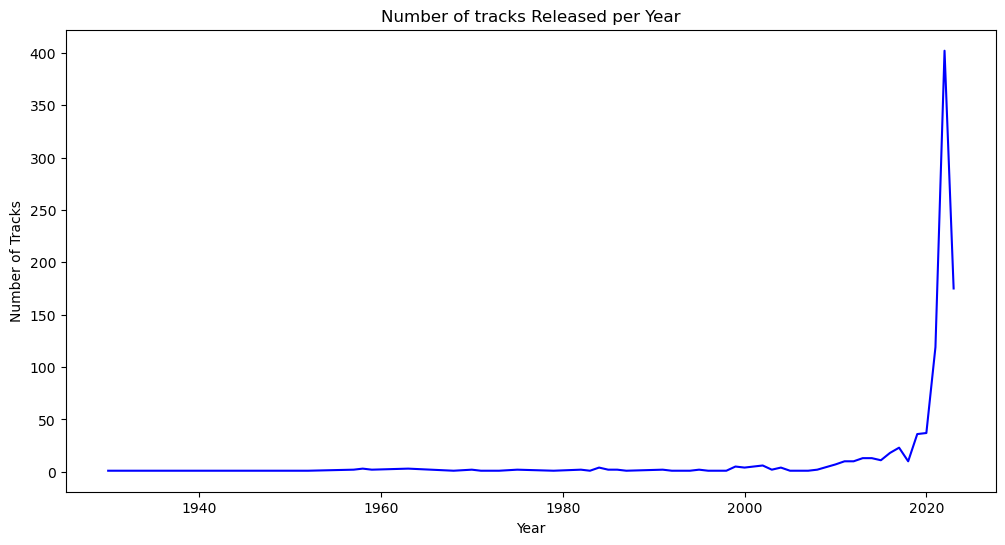

In [28]:
# Sets the figure size to shape (12, 6)
plt.figure(figsize = (12, 6))

# Plots a line plot with 'released_year' and 'count' as x and y respectively
sns.lineplot(data = tracks_inyears, x = 'released_year', y = 'count', color = 'Blue')

# Adds the necessary labels for the graph
plt.title('Number of tracks Released per Year')
plt.xlabel('Year')
plt.ylabel('Number of Tracks')

# Displays the plot
plt.show()

In [29]:
# Counts the total number of tracks released per month
tracks_inmonths = df['released_month'].value_counts().reset_index()

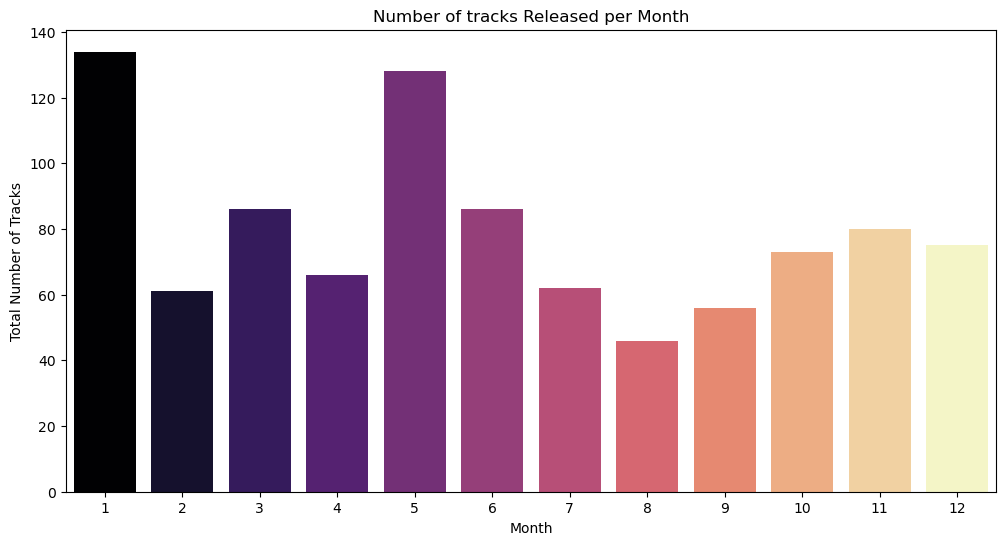

In [30]:
# Sets the figure size to shape (12, 6)
plt.figure(figsize = (12, 6))

# Plots a barplot with 'released_month' and 'count' as x and y respectively
sns.barplot(data = tracks_inmonths, x = 'released_month', y = 'count', hue = 'released_month', palette = 'magma', legend=  False)

# Adds the necessary labels for the graph
plt.title('Number of tracks Released per Month')
plt.xlabel('Month')
plt.ylabel('Total Number of Tracks')

# Displays the plot
plt.show()

In [31]:
# Filters the dataframe to only contain the following columns
columns_to_plot = df[['bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']]

# Calculates the correlation of each selected attribute with the 'streams' column and converts the result to a DataFrame for plotting
correlation_series = columns_to_plot.corrwith(df['streams'])
correlation_df = correlation_series.to_frame(name='Correlation with Streams')

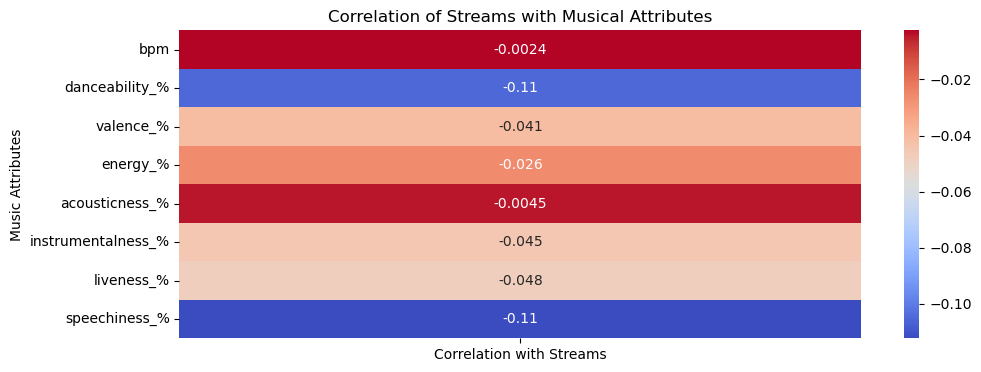

In [32]:
# Sets the figure size to shape (11, 4)
plt.figure(figsize=(11, 4))

# Plots a heatmap for the data frame 'correlation_df'
sns.heatmap(correlation_df, annot=True, cmap='coolwarm')

# Adds the necessary labels for the graph
plt.title('Correlation of Streams with Musical Attributes')
plt.ylabel('Music Attributes')

# Displays the plot
plt.show()

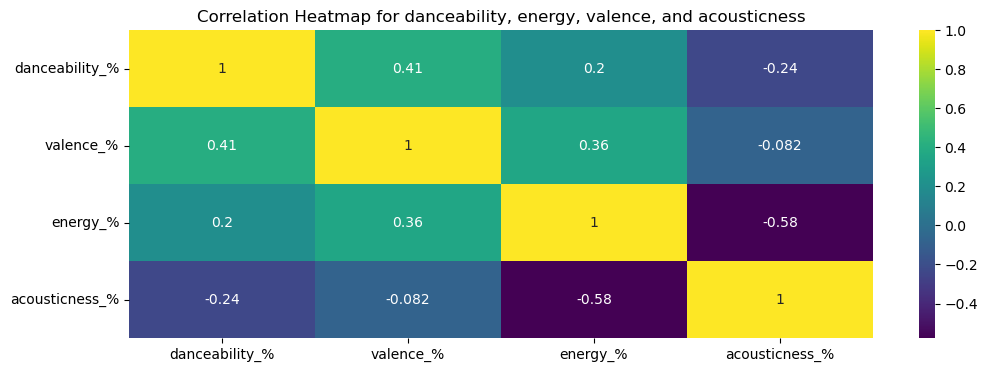

In [33]:
# Sets the figure size to shape (12, 4)
plt.figure(figsize=(12, 4))

# Plots a heatmap for the column_filtered data frame
sns.heatmap(df.iloc[:,17:21].corr(), annot=True, cmap='viridis')

# Adds the necessary label for the graph
plt.title('Correlation Heatmap for danceability, energy, valence, and acousticness')

# Displays the plot
plt.show()

In [34]:
# Obtains the sum of playlist count of each track
total_perplaylist = df[['in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists']].sum().reset_index()

# Sets the column names to 'Platform' and 'Total Playlists' respectively
total_perplaylist.columns = ['Platform', 'Total Playlists']

# Renames the values in the 'Platform' column
total_perplaylist['Platform'] = ['Spotify Playlist', 'Apple Playlist', 'Deezer Playlist']

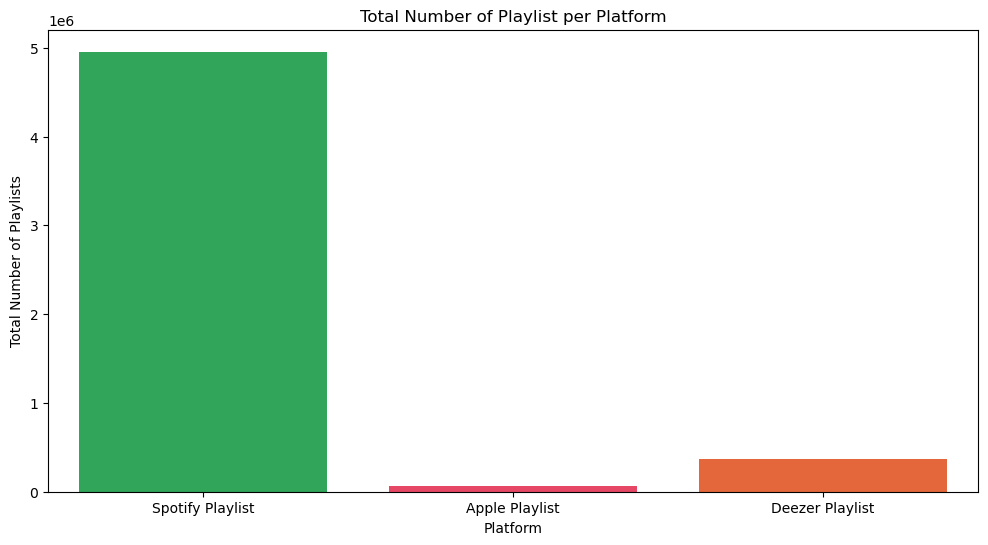

In [35]:
# Sets the figure size to shape (12, 6)
plt.figure(figsize=(12,6))

# Plots a barplot with 'Platform' and 'Total Playlists' as x and y respectively
sns.barplot(data = total_perplaylist, x = 'Platform', y = 'Total Playlists', hue = 'Platform', palette = ['#1DB954', '#FF2D55', '#FF5A1F'])

# Adds the necessary label for the graph
plt.title('Total Number of Playlist per Platform')
plt.xlabel('Platform')
plt.ylabel('Total Number of Playlists')

# Displays the Plot
plt.show()

In [36]:
# Groups and sums the common values in 'key' with the exception of 'unrecorded' values
key_streams_group = df[df['key'] != 'unrecorded'].groupby('key')['streams'].sum().reset_index()

# Groups and sums the common values in 'mode'
mode_streams_group = df.groupby('mode')['streams'].sum().reset_index()

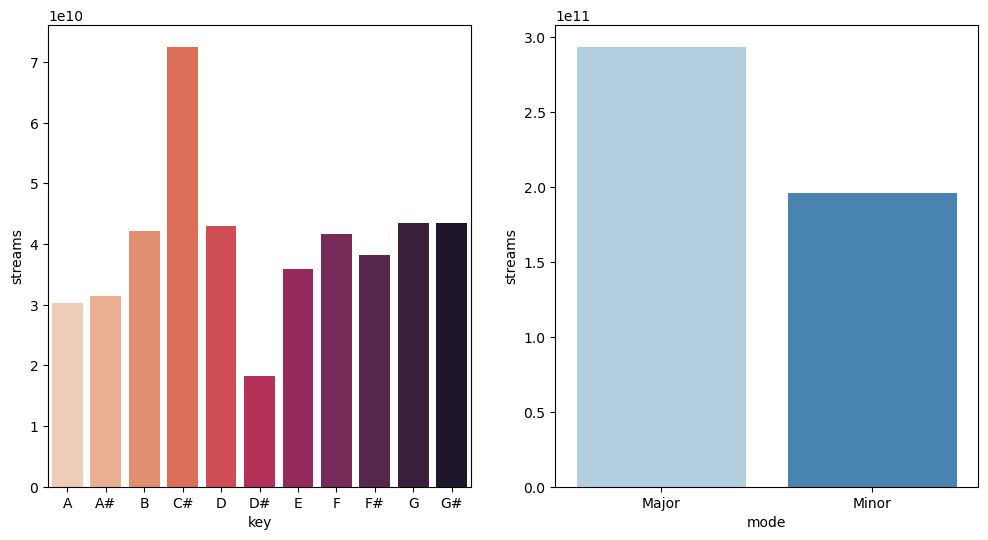

In [37]:
# Sets the figure size to shape (12, 6)
plt.figure(figsize=(12,6))

# Creates a subplot that has 2 plots in position 1
plt.subplot(1,2,1)

# Plots a barplot with 'key' and 'streams' as x and y respectively
sns.barplot(data = key_streams_group, x = 'key', y = 'streams', hue = 'key', palette = 'rocket_r')

# Adds the necessary label for the graph
plt.title = 'Streams v.s. Key',
plt.ylabel = 'Streams'
plt.xlabel = 'Key'

# Creates a subplot that has 2 plots in position 2
plt.subplot(1,2,2)

# Plots a barplot with 'mode' and 'streams' as x and y respectively
sns.barplot(data = mode_streams_group, x = 'mode', y = 'streams', hue = 'mode', palette = 'Blues')

# Adds the necessary label for the graph
plt.title = 'Streams v.s. Key',
plt.ylabel = 'Streams'
plt.xlabel = 'Key'

# Displays the plot
plt.show()

In [38]:
artist_playlists_group = df_exploded.groupby('artist(s)_name')[['in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists']].sum().reset_index()
artist_playlists_group['Total'] = artist_playlists_group.iloc[:,1:].sum(axis=1)
top5_artist_inplaylists = artist_playlists_group.nlargest(5, 'Total')
melted_df_playlist = top5_artist_inplaylists.melt(id_vars='artist(s)_name', value_vars=['in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists', 'Total'],
                                                  var_name='Platform', value_name='Total Number of Playlists')

melted_df_playlist.rename(columns = {'artist(s)_name':'Artist'}, inplace=True)

platform_color = ['#4CAF50', '#F44336', '#FF9800', '#000000']

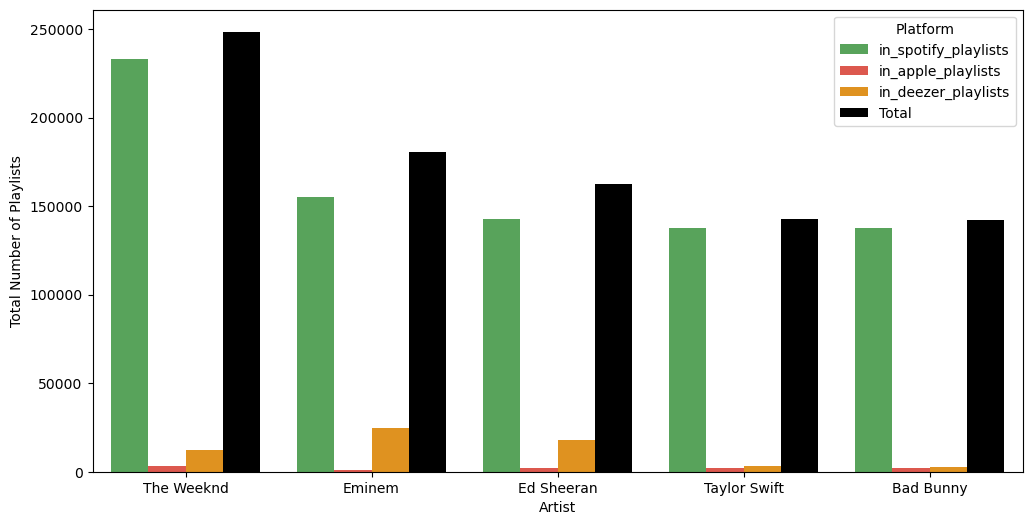

In [39]:
plt.figure(figsize=(12, 6))

sns.barplot(data=melted_df_playlist, x='Artist', y='Total Number of Playlists', hue='Platform', palette=platform_color)
plt.legend(title = "Platform")
plt.xticks(rotation=0)

plt.show()

In [40]:
def convert_to_binary(x):
    if x > 0:
        return 1
    else:
        return 0

df_exploded.iloc[:,[7,10,12,13]] = df_exploded.iloc[:,[7,10,12,13]].map(convert_to_binary)

artist_charts_group = df_exploded.groupby('artist(s)_name')[['in_spotify_charts', 'in_apple_charts', 'in_deezer_charts', 'in_shazam_charts']].sum().reset_index()

artist_charts_group['Total'] = artist_charts_group.iloc[:,1:].sum(axis=1)
top5_artist_incharts = artist_charts_group.nlargest(5, 'Total')
melted_df_charts = top5_artist_incharts.melt(id_vars='artist(s)_name', value_vars=['in_spotify_charts', 'in_apple_charts', 'in_deezer_charts', 'in_shazam_charts', 'Total'],
                                             var_name='Platform', value_name='Total Number of Charts Achieved')

melted_df_charts.rename(columns = {'artist(s)_name':'Artist'}, inplace=True)

platform_color = ['#4CAF50', '#F44336', '#FF9800', '#0000FF', '#000000']

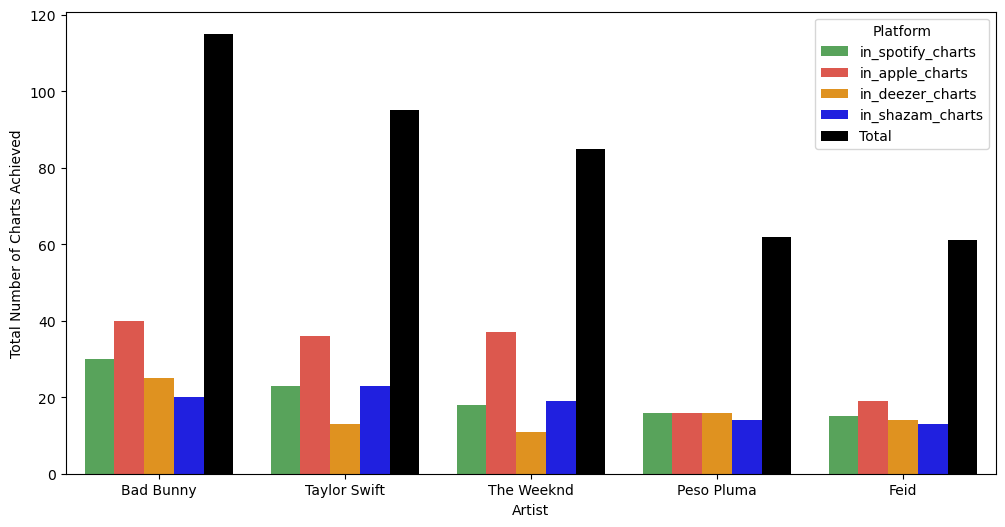

In [41]:
plt.figure(figsize=(12, 6))

sns.barplot(data=melted_df_charts, x='Artist', y='Total Number of Charts Achieved', hue='Platform', palette=platform_color)
plt.legend(title = "Platform")
plt.xticks(rotation=0)

plt.show()